In [13]:
using Pkg
Pkg.activate("../.."); # Actives the environment at the root of the project
# Using our Carbon-I and vSmartMOM packages (developed by our team)

using CairoMakie, DelimitedFiles, Statistics, Interpolations, NCDatasets
using Unitful, UnitfulEquivalences, Printf
include(joinpath("../../src/Plots", "CI_colorsNew.jl"));
set_theme!(theme_ggplot2())

  Activating project at `~/code/gitHub/CarbonI`


In [18]:
CarbonI_colors

In [49]:
# Read data from other notebooks
req_errors = Dataset("../../errors_as_function_of_albedo_and_sza_req.nc");
cbe_errors = Dataset("../../errors_as_function_of_albedo_and_sza_cbe.nc");
alb = req_errors["albedo"][:];
szas = req_errors["sza"][:];
#l1_2_data = readdlm("../../data/L1s/L1-2_lines.dat");
#TotalEfficiencies = l1_2_data[:, 1];

16-element Vector{Float64}:
  5.0
 10.0
 15.0
 20.0
 25.0
 30.0
 35.0
 40.0
 45.0
 50.0
 55.0
 60.0
 65.0
 70.0
 75.0
 80.0

In [65]:
ch4_err_req = req_errors["CH4_error"][:];
co2_err_req = req_errors["CO2_error"][:]/1e3;
n2o_err_req = req_errors["N2O_error"][:];
co_err_req = req_errors["CO_error"][:];

ch4_err_cbe  = cbe_errors["CH4_error"][:];
co2_err_cbe  = cbe_errors["CO2_error"][:]/1e3;
n2o_err_cbe  = cbe_errors["N2O_error"][:];
co_err_cbe = cbe_errors["CO_error"][:];

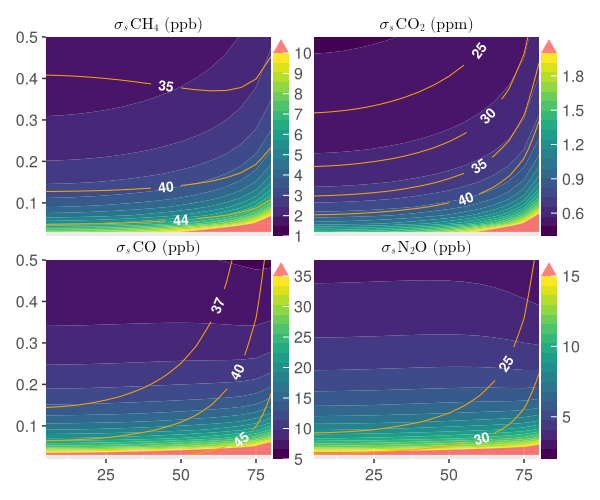

In [ ]:
iAlb = argmin(abs.(alb.-0.2))
iSZA = argmin(abs.(szas.-40))

f = Figure(resolution=(600,500))
#ax = Axis(f[1,1], xlabel="Solar Zenith Angle (Degrees)", ylabel="Surface Albedo", yticks=0.6:0.2:1.4, title="From required σₛ to total system efficiency (All Modes)")
ax1 = f[1,1] = GridLayout()
ax2 = f[1, 2]= GridLayout()#,xlabel="Solar Zenith Angle (degrees)", ylabel="Surface Albedo")
ax3 = f[2, 1]= GridLayout()#,xlabel="Solar Zenith Angle (degrees)", ylabel="Surface Albedo")
ax4 = f[2, 2]= GridLayout()#xlabel="Solar Zenith Angle (degrees)", ylabel="Surface Albedo")

axtop = Axis(ax1[1,1])
axtop.title = L"\sigma_s \, \text{CH_4 (ppb)}"
axtop2 = Axis(ax2[1,1])
axtop2.title = L"\sigma_s \, \text{CO_2 (ppm)}"
axtop3 = Axis(ax3[1,1])
axtop3.title = L"\sigma_s \, \text{CO (ppb)}"
axtop4 = Axis(ax4[1,1])
axtop4.title = L"\sigma_s \, \text{N_2O (ppb)}"
c = to_color(:red)
c2 = RGBAf(c.r, c.g, c.b,0.5)
scale =sqrt(10)

ch4 = CairoMakie.contourf!(ax1[1,1],szas, alb, ch4_err_cbe/scale, levels=range(1,10,20), extendhigh=c2)

contour!(ax1[1,1], szas, alb, abs.(1 .- ch4_err_cbe./ch4_err_req)*100, levels=[35,40,44],  labels=true,  labelsize = 14,labelfont = :bold, labelcolor = :white, color = :orange)
#CairoMakie.scatter!(ax1[1,1],szas[iSZA], alb[iAlb], ch4_err_req[iSZA,iAlb]/scale, color=:red)
#tt = @sprintf("%.2g", ch4_err_req[iSZA,iAlb]/scale) * "ppb"
#CairoMakie.text!(ax1[1,1],szas[iSZA]+1, alb[iAlb]+0.005, text = tt, color=:white, fontsize=18, font = :bold)


co  = CairoMakie.contourf!(ax3[1,1],szas, alb, co_error_cbe/scale, levels=range(5,35,20), extendhigh=c2)
contour!(ax3[1,1], szas, alb, abs.(1 .- co_err_cbe./co_err_req)*100, levels=[37,40,45],  labels=true,  labelsize = 14,labelfont = :bold, labelcolor = :white, color = :orange)
#CairoMakie.scatter!(ax3[1,1],szas[iSZA], alb[iAlb], co_error_req[iSZA,iAlb]/scale, color=:red)
#tt = @sprintf("%.2g", co_error_req[iSZA,iAlb]/scale) * "ppb"
#CairoMakie.text!(ax3[1,1],szas[iSZA]+1, alb[iAlb]+0.005, text = tt, color=:white, fontsize=18, font = :bold)

co2 = CairoMakie.contourf!(ax2[1,1],szas, alb, co2_err_cbe/scale, levels=range(0.4,2.0,20), extendhigh=c2)
contour!(ax2[1,1], szas, alb, abs.(1 .- co2_err_cbe./co2_err_req)*100, levels=[25,30,35,40],  labels=true,  labelsize = 14,labelfont = :bold, labelcolor = :white, color = :orange)
#CairoMakie.scatter!(ax2[1,1],szas[iSZA], alb[iAlb], co2_err_req[iSZA,iAlb]/scale, color=:red)
#tt = @sprintf("%.2g", co2_err_req[iSZA,iAlb]/scale) * "ppm"
#CairoMakie.text!(ax2[1,1],szas[iSZA]+1, alb[iAlb]+0.005, text = tt, color=:white, fontsize=18, font = :bold)
n2o = CairoMakie.contourf!(ax4[1,1],szas, alb, n2o_err_cbe/scale, levels=range(2,15,20), extendhigh=c2)
contour!(ax4[1,1], szas, alb, abs.(1 .- n2o_err_cbe./n2o_err_req)*100, levels=[22,25,30], labels=true,  labelsize = 14,labelfont = :bold, labelcolor = :white, color = :orange)
#CairoMakie.scatter!(ax4[1,1],szas[iSZA], alb[iAlb],color=:red)
#tt = @sprintf("%.2g", n2o_err_req[iSZA,iAlb]/scale) * "ppb"
#CairoMakie.text!(ax4[1,1],szas[iSZA]+1, alb[iAlb]+0.005, text = tt, color=:white, fontsize=18, font = :bold)
#for a in (ax1, ax2, ax3, ax4)
#    CairoMakie.lines!(a[1,1], [0,80],[0.05,0.05], color=:black, alpha=0.5)
#end
Colorbar(ax1[1, 2], ch4)#, label="CH₄ error (ppb)")
Colorbar(ax3[1, 2], co)#, label="CO error (ppb)")
Colorbar(ax2[1, 2], co2)#, label="CO₂ error (ppm)")
Colorbar(ax4[1, 2], n2o)#, label="N₂O error (ppb)")

for a in (axtop,axtop2,axtop3,axtop4)
    CairoMakie.xlims!(a,(5,80))
    CairoMakie.ylims!(a,(0.02,0.5))
    #colgap!(a,10)
    #rowgap!(a,10)
end
for a in (ax1,ax2,ax3,ax4)
    colgap!(a,2)
end

rowgap!(f.layout,3)
colgap!(f.layout,3)
hidexdecorations!(axtop)
hidexdecorations!(axtop2)
hideydecorations!(axtop2)
hideydecorations!(axtop4)
f
#axislegend(ax,position = :rt)
save("../../plots/final/SectionD-ErrorContours.pdf",f)
save("../../plots/final/SectionD-ErrorContours.eps",f)
f